In [82]:
"""
Owner: Muhammad Waleed Usman
Date: 8th April, 2021
"""

'\nOwner: Muhammad Waleed Usman\nDate: 8th April, 2021\n'

In [83]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from collections import Counter

In [84]:
def degree_distribution(input_graph):
    """Plot degree Distribution
    :param input_graph: Input Graph
    :return: figure to plot
    """
    degree_sequence = sorted([d for n, d in input_graph.degree()], reverse=True)  # degree sequence
    degree_count = Counter(degree_sequence)
    deg, cnt = zip(*degree_count.items())
    plt.clf()
    plt.bar(deg, cnt, width=0.80, color="b")
    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.show()

In [85]:
def shortest_path(input_graph):
    shortest_path_input_graph = nx.shortest_path_length(input_graph)
    shortest_path_input_graph_df = pd.DataFrame(shortest_path_input_graph)
    shortest_path_input_graph_df.hist()

In [86]:
def cc_distribution(input_graph):
    cluster_network = nx.clustering(input_graph)
    plt.clf()
    color_map = plt.get_cmap('hsv')
    norm = plt.Normalize(0, max(cluster_network.values()))
    node_colors = [color_map(norm(cluster_network[node])) for node in input_graph.nodes]
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
    nx.draw_spring(input_graph, node_color=node_colors, with_labels=True, ax=ax1)
    fig.colorbar(ScalarMappable(cmap=color_map, norm=norm), label='Clustering', shrink=0.95, ax=ax1)
    ax2.hist(cluster_network.values(), bins=2)
    ax2.set_xlabel('Clustering')
    ax2.set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [87]:
def wcc_distribution(input_graph):
    """Plot weakly connected components size distributions
    :param input_graph: input graph for the wcc distribution
    """
    wcc_graph = nx.weakly_connected_components(input_graph)
    wcc_sizes = Counter([len(wcc) for wcc in wcc_graph])
    size_seq = sorted(wcc_sizes.keys())
    size_hist = [wcc_sizes[x] for x in size_seq]
    plt.clf()
    plt.figure(figsize=(16, 12))
    plt.title("wcc distribution")
    plt.xlabel("size")
    plt.ylabel("wcc")
    plt.loglog(size_seq, size_hist, 'ro-')


In [88]:
GrQc_df = pd.read_csv('data/CA-GrQc.txt', sep="\t",
                 header=0)
print('General Relativity and Quantum Cosmology dataframe')
GrQc_df.head()

General Relativity and Quantum Cosmology dataframe


,FromNodeId,ToNodeId
0,3466,937
1,3466,5233
2,3466,8579
3,3466,10310
4,3466,15931


In [89]:
AstroPh_df = pd.read_csv('data/CA-AstroPh.txt', sep="\t",
                 header=0)
print('Astro Physics collaboration network dataframe')
AstroPh_df.head()

Astro Physics collaboration network dataframe


,FromNodeId,ToNodeId
0,84424,276
1,84424,1662
2,84424,5089
3,84424,6058
4,84424,6229


In [90]:
# GrQc_graph= nx.from_pandas_edgelist(GrQc_df, 'FromNodeId', 'ToNodeId', create_using=nx.DiGraph())
GrQc_graph= nx.from_pandas_edgelist(GrQc_df, 'FromNodeId', 'ToNodeId', create_using=nx.DiGraph())

In [91]:
# AstroPh_graph= nx.from_pandas_edgelist(AstroPh_df, 'FromNodeId', 'ToNodeId', create_using=nx.DiGraph())
AstroPh_graph= nx.from_pandas_edgelist(AstroPh_df, 'FromNodeId', 'ToNodeId', create_using=nx.DiGraph())

In [92]:
erdos_renyi_graph = nx.erdos_renyi_graph(n=5242, p=1,  seed=None, directed=True)
watts_strogatz_graph = nx.watts_strogatz_graph(n=5242, k=2, p=0.1, seed=None)
watts_strogatz_graph = nx.DiGraph(watts_strogatz_graph)

In [93]:
erdos_renyi_graph_astro = nx.erdos_renyi_graph(n=18772, p=1,  seed=None, directed=True)
watts_strogatz_graph_astro = nx.watts_strogatz_graph(n=18772, k=2, p=0.1, seed=None)
watts_strogatz_graph_astro = nx.DiGraph(watts_strogatz_graph_astro)

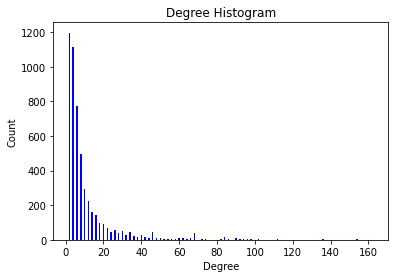

In [94]:
degree_distribution(GrQc_graph)

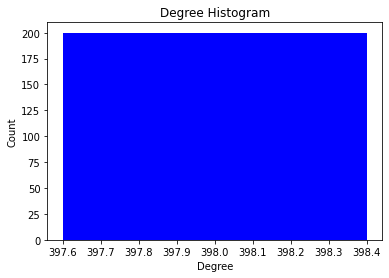

In [95]:
degree_distribution(erdos_renyi_graph)

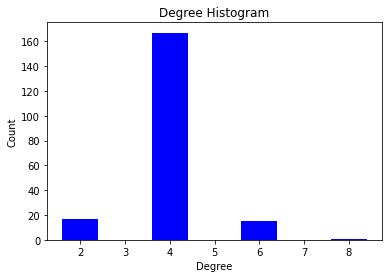

In [96]:
degree_distribution(watts_strogatz_graph)

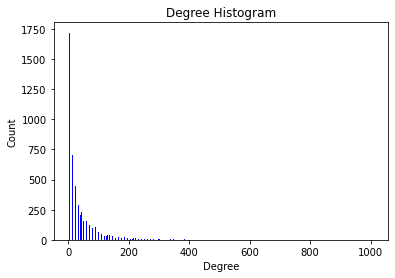

In [97]:
degree_distribution(AstroPh_graph)


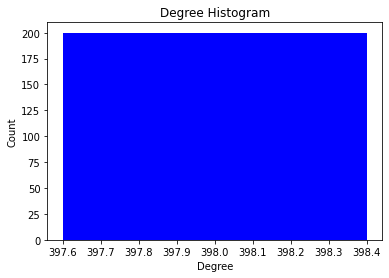

In [98]:
degree_distribution(erdos_renyi_graph_astro)

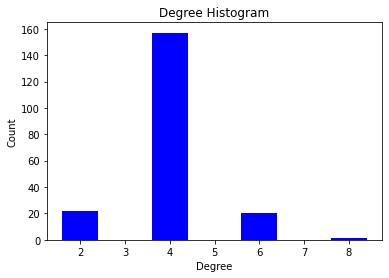

In [99]:
degree_distribution(watts_strogatz_graph_astro)

In [100]:
##################################### Shortest Path Distribution ######################################################

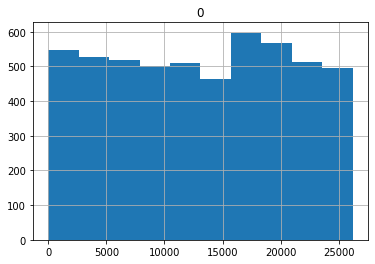

In [101]:
shortest_path(GrQc_graph)

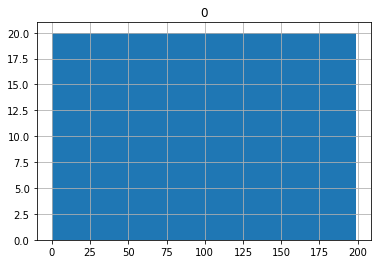

In [102]:
shortest_path(erdos_renyi_graph)

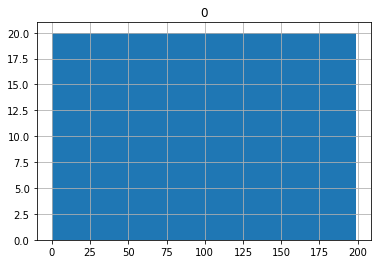

In [103]:
shortest_path(watts_strogatz_graph)

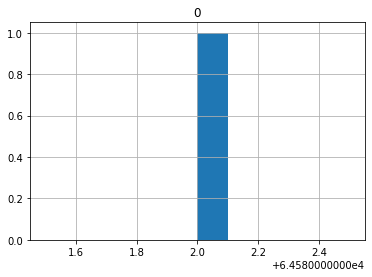

In [104]:
AstroPh_graph_component = AstroPh_graph.subgraph(sorted(nx.strongly_connected_components(AstroPh_graph), key=len)[0])
shortest_path(AstroPh_graph_component)

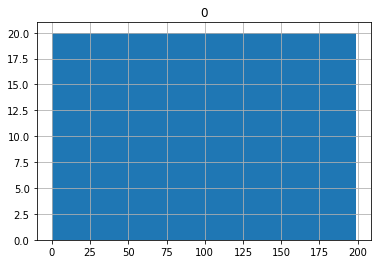

In [105]:
shortest_path(erdos_renyi_graph_astro)

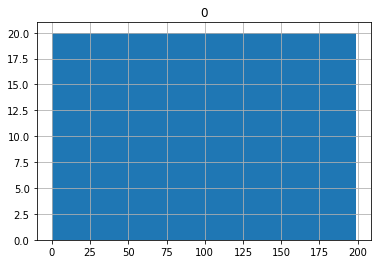

In [106]:
shortest_path(watts_strogatz_graph_astro)

In [107]:
##################################### Clustering Coefficient Distributions ######################################################

<Figure size 432x288 with 0 Axes>

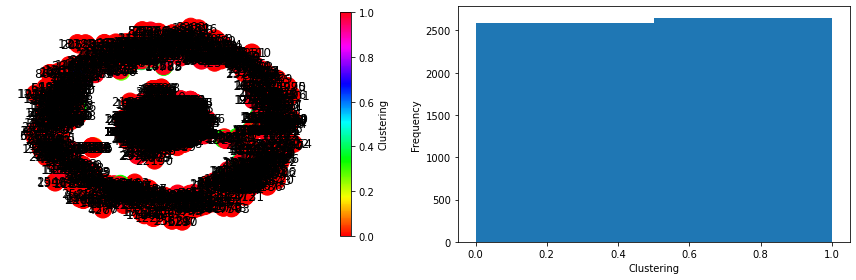

In [108]:
cc_distribution(GrQc_graph)

<Figure size 432x288 with 0 Axes>

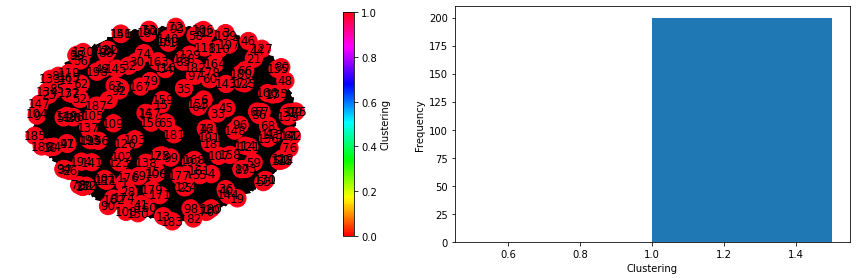

In [109]:
cc_distribution(erdos_renyi_graph)


<Figure size 432x288 with 0 Axes>

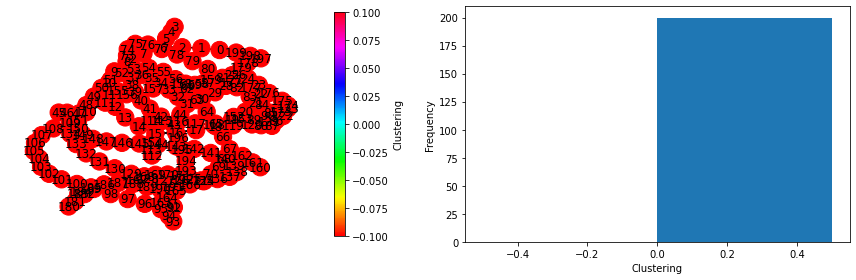

In [110]:
cc_distribution(watts_strogatz_graph)

<Figure size 432x288 with 0 Axes>

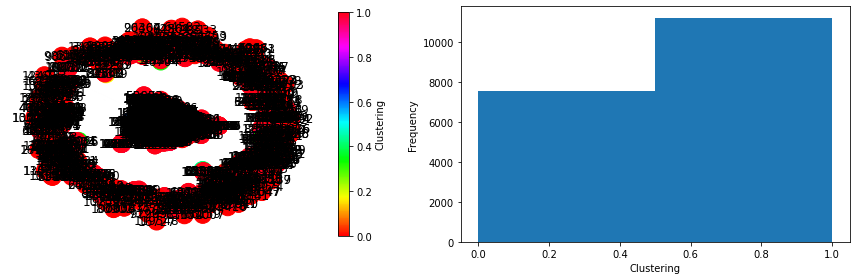

In [111]:
cc_distribution(AstroPh_graph)

<Figure size 432x288 with 0 Axes>

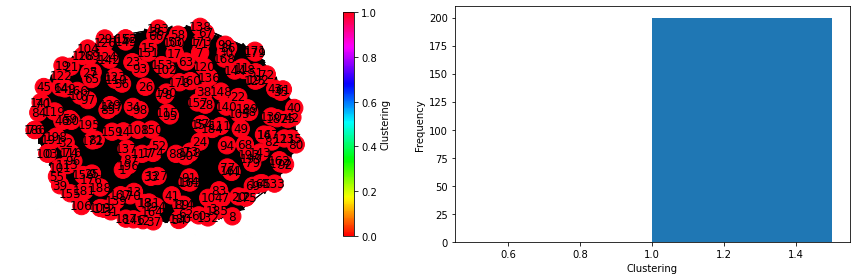

In [112]:
cc_distribution(erdos_renyi_graph_astro)
#

<Figure size 432x288 with 0 Axes>

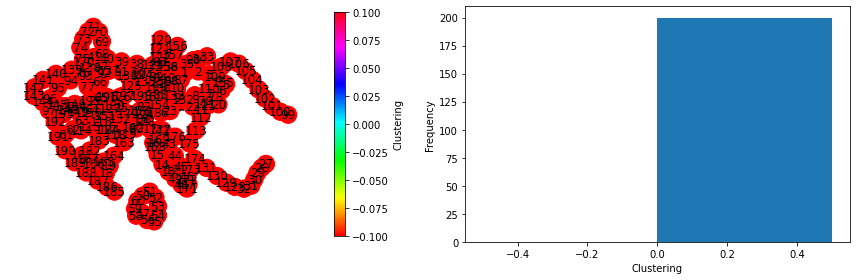

In [113]:
cc_distribution(watts_strogatz_graph_astro)

In [114]:
##################################### WCC Distributions ######################################################

<Figure size 432x288 with 0 Axes>

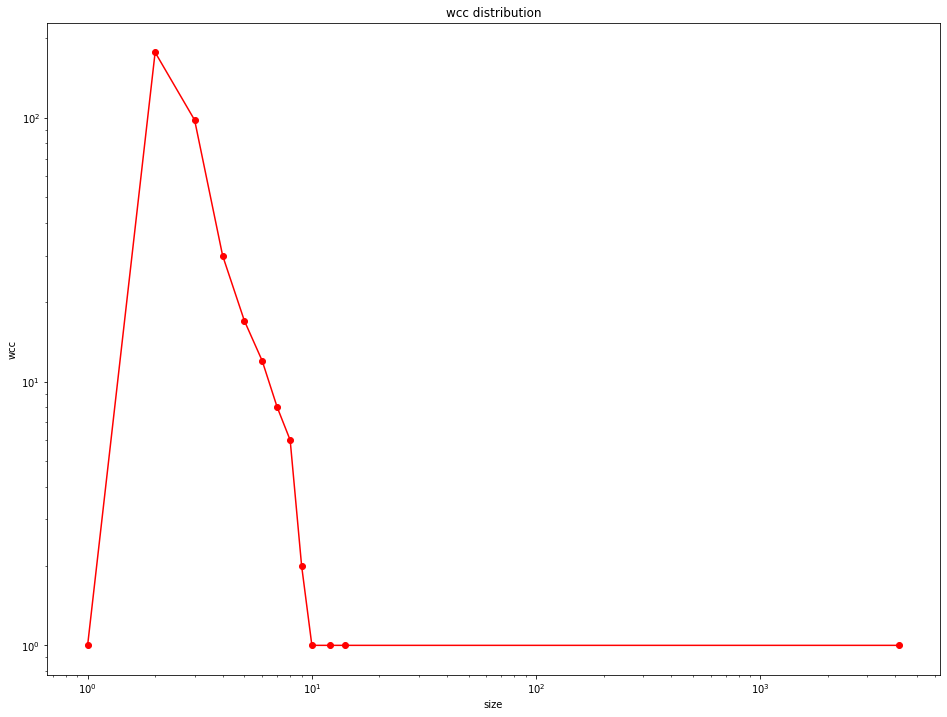

In [115]:
wcc_distribution(GrQc_graph)

<Figure size 432x288 with 0 Axes>

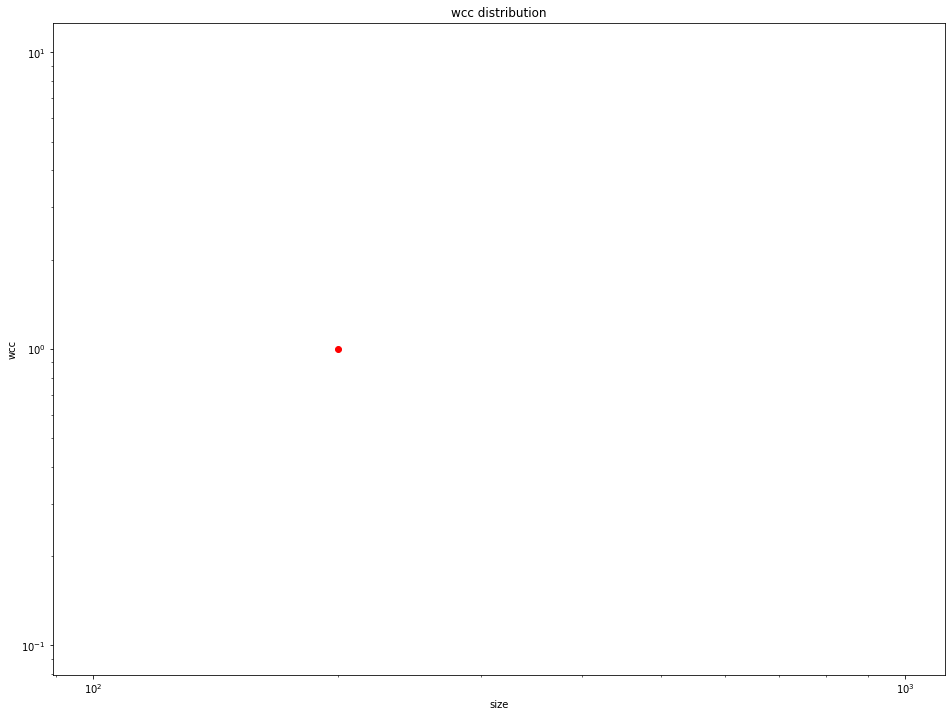

In [116]:
wcc_distribution(erdos_renyi_graph)
#

<Figure size 432x288 with 0 Axes>

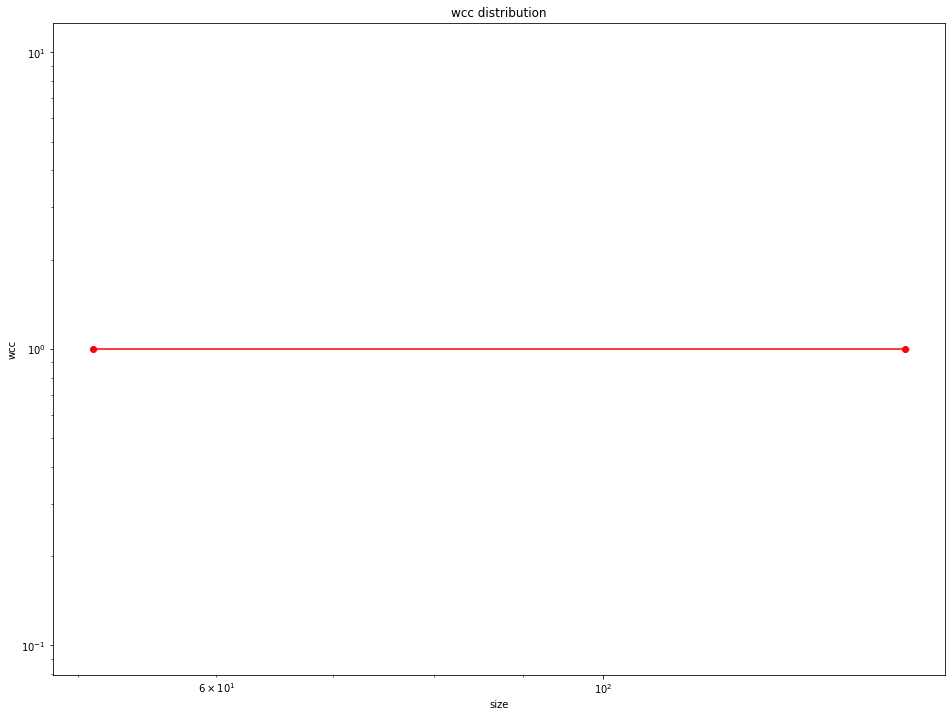

In [117]:
wcc_distribution(watts_strogatz_graph)

<Figure size 432x288 with 0 Axes>

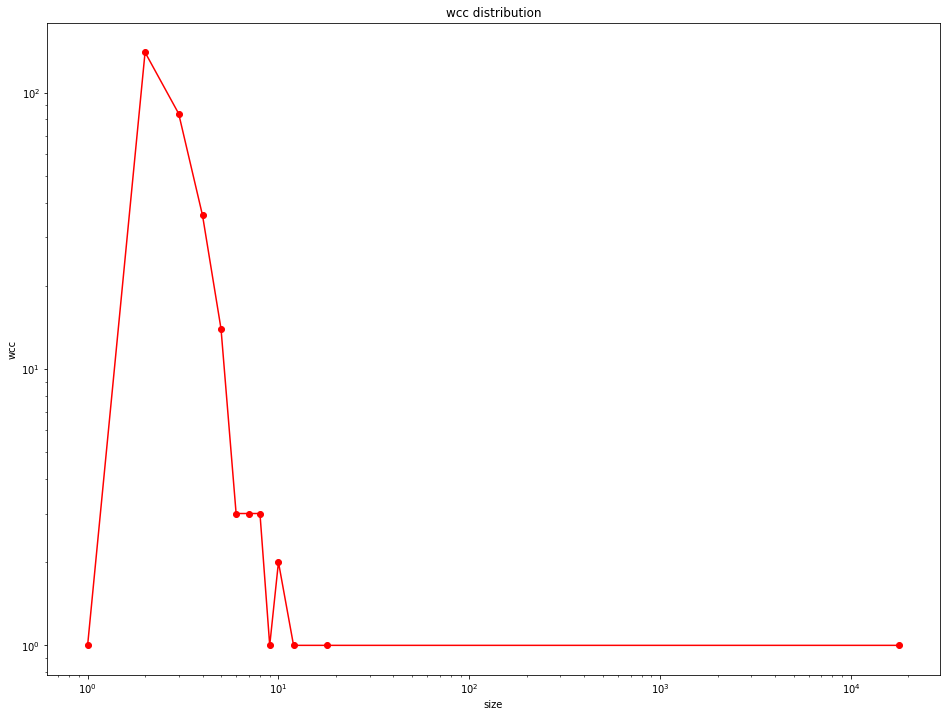

In [118]:
wcc_distribution(AstroPh_graph)

<Figure size 432x288 with 0 Axes>

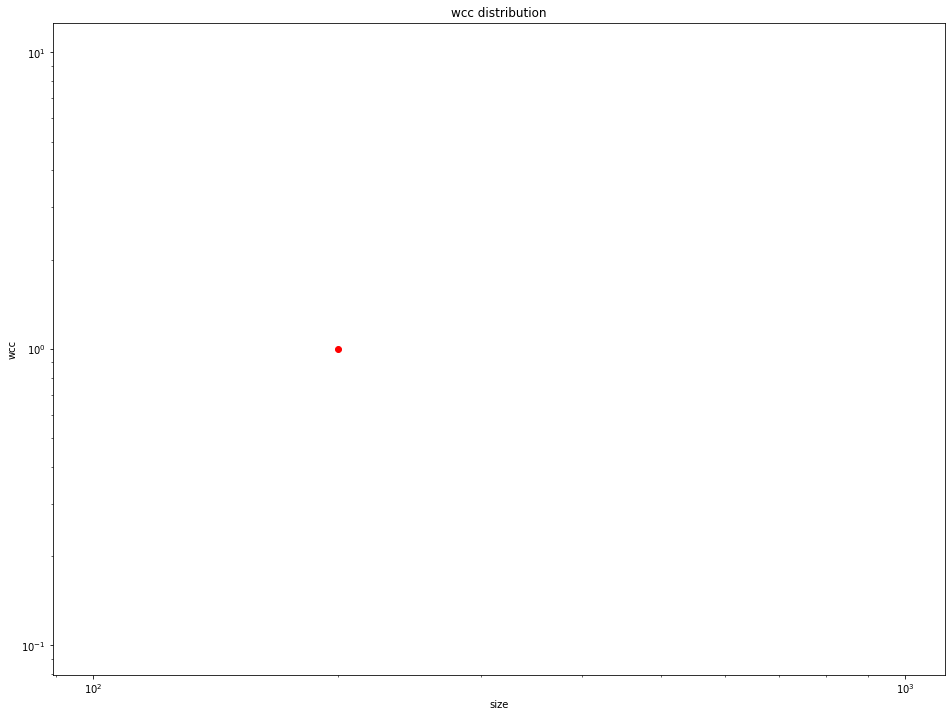

In [119]:
wcc_distribution(erdos_renyi_graph_astro)
#

<Figure size 432x288 with 0 Axes>

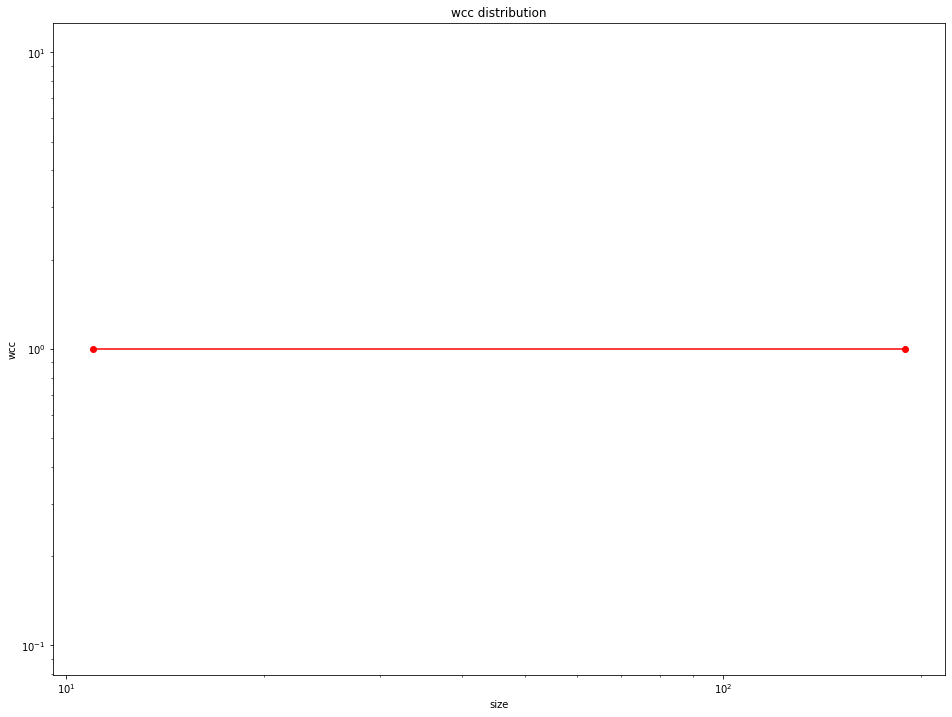

In [120]:
wcc_distribution(watts_strogatz_graph_astro)